## Imports

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
module_root = '..'
import sys,os
sys.path.append(module_root)
#from project import settings as s
from ipywidgets import interact

## Load Files

In [2]:
# Give the npy folder uid
data_folder_uid = '2017_03_29_17_02'

## Choose mode(train/validation) and mean/std processing:

In [3]:
mean_sub_std_div = False
mode = 'train'
#mode = 'validation'
#mode = 'validation_original'

#### 1. Load Text files

In [4]:
# Load text files
npy_folder = os.path.join(data_folder_uid)
uids_file = os.path.join(npy_folder,mode , "uids.txt")
with open(uids_file) as f:
    uids = f.read().splitlines()
clinsig_file = os.path.join(npy_folder,mode , "clinsig.txt")
with open(clinsig_file) as f:
    clinsig = f.read().splitlines()
zones_file = os.path.join(npy_folder,mode , "zones.txt")
with open(zones_file) as f:
    zones = f.read().splitlines()
config_file = os.path.join(npy_folder,'config.csv')

#### Check for subject leakage

In [5]:
with open(config_file, mode='r') as infile:
    reader = csv.reader(infile)
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        config = {rows[0]:rows[1] for rows in reader}
permutation_dir = config['PERMUTATION_DIRECTORY']
training_file = os.path.join(permutation_dir, 'training.txt')
validation_file = os.path.join(permutation_dir, 'validation.txt')
with open(training_file) as f:
    training_subjects = f.read().splitlines()
with open(validation_file) as f:
    validation_subjects = f.read().splitlines()

In [6]:
for uid in uids:
    patient_id = uid.split('_')[0]
    if mode == 'train':
        if patient_id in validation_subjects:
            print('data leakage')
            print(patient_id)
    if mode == 'validation':
        if patient_id in training_subjects:
            print('data leakage')
            print(patient_id)

In [7]:
patient_id

'ProstateX-0115'

#### 2. Load numpy arrays

In [8]:
clinsig_arr = np.load(os.path.join(npy_folder, mode , "clinsig.npy"))
zones_arr = np.load(os.path.join(npy_folder, mode , "zone_encoding.npy"))
zones_arr_sum = np.sum(zones_arr, axis=0)

PZ TZ AS
[3246 3384 3370]


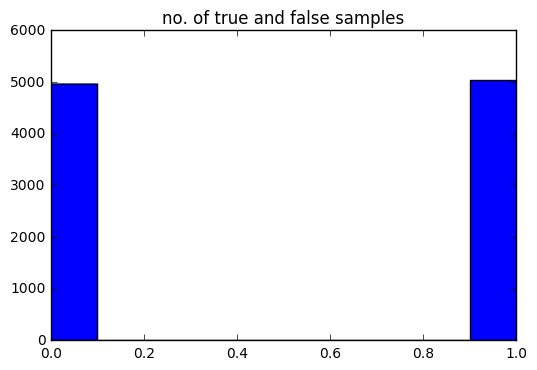

In [9]:
print('PZ TZ AS')
print(zones_arr_sum)
plt.hist(clinsig_arr);
plt.title('no. of true and false samples');

In [10]:
# Load mean files
tra_mean = np.load(os.path.join(npy_folder, "mean_train","mean_train_tra.npy"))
cor_mean = np.load(os.path.join(npy_folder,  "mean_train","mean_train_cor.npy"))
sag_mean = np.load(os.path.join(npy_folder,  "mean_train","mean_train_sag.npy"))
adc_mean = np.load(os.path.join(npy_folder,  "mean_train","mean_train_adc.npy"))
bval_mean = np.load(os.path.join(npy_folder,  "mean_train","mean_train_bval.npy"))
ktrans_mean = np.load(os.path.join(npy_folder,  "mean_train","mean_train_ktrans.npy"))
# Load std files
tra_std = np.load(os.path.join(npy_folder,  "std_train","std_train_tra.npy"))
cor_std = np.load(os.path.join(npy_folder,  "std_train","std_train_cor.npy"))
sag_std = np.load(os.path.join(npy_folder,  "std_train","std_train_sag.npy"))
adc_std = np.load(os.path.join(npy_folder,  "std_train","std_train_adc.npy"))
bval_std = np.load(os.path.join(npy_folder,  "std_train","std_train_bval.npy"))
ktrans_std = np.load(os.path.join(npy_folder,  "std_train","std_train_ktrans.npy"))

In [11]:
tra = np.load(os.path.join(npy_folder, mode , "tra.npy"))
if mean_sub_std_div:
    tra -= tra_mean
    tra /= tra_std
cor = np.load(os.path.join(npy_folder, mode , "cor.npy"))
if mean_sub_std_div:
    cor -= cor_mean
    cor /= cor_std
sag = np.load(os.path.join(npy_folder, mode , "sag.npy"))
if mean_sub_std_div:
    sag -= sag_mean
    sag /= sag_std
adc = np.load(os.path.join(npy_folder, mode , "adc.npy"))
if mean_sub_std_div:
    adc -= adc_mean
    adc /= adc_std
bval = np.load(os.path.join(npy_folder, mode , "bval.npy"))
#clinsig = np.load(os.path.join(npy_folder, mode , "clinsig.npy"))
#zones = np.load(os.path.join(npy_folder, mode , "zone_encoding.npy"))
anatomical = np.load(os.path.join(npy_folder, mode , "anatomical.npy"))
if mean_sub_std_div:
    bval -= bval_mean
    bval /= bval_std
ktrans = np.load(os.path.join(npy_folder, mode , "ktrans.npy"))
if mean_sub_std_div:
    ktrans -= ktrans_mean
    ktrans /= ktrans_std

In [12]:
print(tra_mean.shape)
print(adc_mean.shape)

(1, 12, 64, 64)
(1, 12, 32, 32)


In [13]:
def browse_mean():
    n = tra_mean.shape[1]
    def view_image(slice_number):
        fig = plt.figure(figsize=(12, 6));
        plt.subplot(231)
        ax = plt.imshow(tra_mean[0,slice_number,:,:],cmap=plt.cm.gray)
        fig.colorbar(ax)
        plt.subplot(232)
        ax = plt.imshow(sag_mean[0,slice_number,:,:],cmap=plt.cm.gray)
        fig.colorbar(ax)
        plt.subplot(233)
        ax = plt.imshow(cor_mean[0,slice_number,:,:],cmap=plt.cm.gray)
        fig.colorbar(ax)
        plt.subplot(234)
        ax = plt.imshow(adc_mean[0,slice_number,:,:])
        fig.colorbar(ax)
        plt.subplot(235)
        ax = plt.imshow(bval_mean[0,slice_number,:,:])
        fig.colorbar(ax)
        plt.subplot(236)
        ax = plt.imshow(ktrans_mean[0,slice_number,:,:])
        fig.colorbar(ax)
    interact(view_image, slice_number=(0,n-1)) 
    

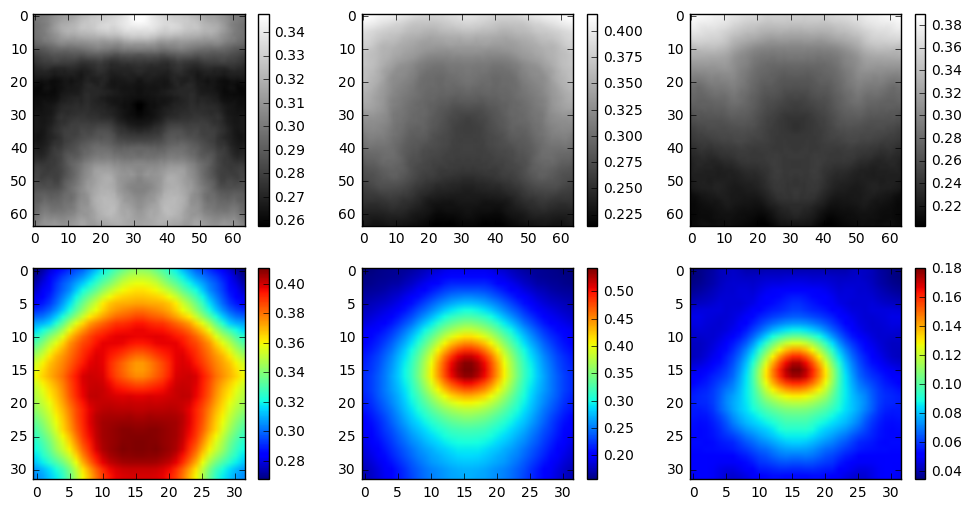

In [14]:
browse_mean()

In [15]:
def browse_std():
    n = tra_std.shape[1]
    def view_image(slice_number):
        fig = plt.figure(figsize=(12, 6));
        plt.subplot(231)
        ax = plt.imshow(tra_std[0,slice_number,:,:],cmap=plt.cm.gray)
        fig.colorbar(ax)
        plt.subplot(232)
        ax = plt.imshow(sag_std[0,slice_number,:,:],cmap=plt.cm.gray)
        fig.colorbar(ax)
        plt.subplot(233)
        ax = plt.imshow(cor_std[0,slice_number,:,:],cmap=plt.cm.gray)
        fig.colorbar(ax)
        plt.subplot(234)
        ax = plt.imshow(adc_std[0,slice_number,:,:])
        fig.colorbar(ax)
        plt.subplot(235)
        ax = plt.imshow(bval_std[0,slice_number,:,:])
        fig.colorbar(ax)
        plt.subplot(236)
        ax = plt.imshow(ktrans_std[0,slice_number,:,:])
        fig.colorbar(ax)
    interact(view_image, slice_number=(0,n-1)) 
    

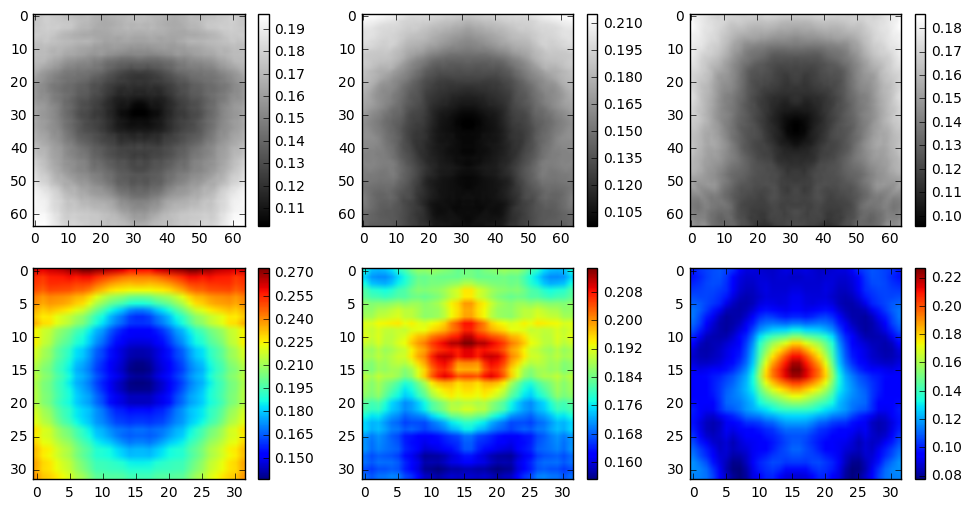

In [16]:
browse_std()

In [17]:
def browse_images_3d(tra):
    n = len(tra)
    m = tra.shape[2]
    def view_image(sample,slice):
        fig = plt.figure(figsize=(12, 6))
        plt.suptitle("ID: {0}, Zone: {1}, ClinSig: {2}".format(uids[sample],zones[sample], clinsig[sample]),size=14)
        plt.subplot(231)
        ax = plt.imshow(tra[sample,0,slice,:,:],cmap=plt.cm.gray, interpolation='none')
        fig.colorbar(ax)
        plt.title('T2 Axial')
        plt.subplot(232)
        ax = plt.imshow(cor[sample,0,slice,:,:],cmap=plt.cm.gray, interpolation='none')
        fig.colorbar(ax)
        plt.title('T2 Coronal')
        plt.subplot(233)
        ax = plt.imshow(sag[sample,0,slice,:,:],cmap=plt.cm.gray, interpolation='none')
        fig.colorbar(ax)
        plt.title('T2 Saggital')
        plt.subplot(234)
        ax = plt.imshow(adc[sample,0,slice,:,:], interpolation='none')
        fig.colorbar(ax)
        plt.title('ADC')
        plt.subplot(235)
        ax = plt.imshow(bval[sample,0,slice,:,:], interpolation='none')
        fig.colorbar(ax)
        plt.title('BVal')
        plt.subplot(236)
        ax = plt.imshow(ktrans[sample,0,slice,:,:], interpolation='none')
        plt.title('KTrans')
        fig.colorbar(ax)
    interact(view_image, sample=(0,n-1), slice=(0,m-1))

In [18]:
def browse_images_2d(tra):
    n = len(tra)
    def view_image(sample):
        fig = plt.figure(figsize=(12, 6))
        plt.suptitle("{0}, Zone: {1}, ClinSig: {2}".format(uids[sample],zones[sample], clinsig[sample]),size=14)
        plt.subplot(231)
        ax = plt.imshow(tra[sample,0,:,:],cmap=plt.cm.gray, interpolation='none')
        fig.colorbar(ax)
        plt.title('T2 Axial')
        plt.subplot(232)
        ax = plt.imshow(cor[sample,0,:,:],cmap=plt.cm.gray, interpolation='none')
        fig.colorbar(ax)
        plt.title('T2 Coronal')
        plt.subplot(233)
        ax = plt.imshow(sag[sample,0,:,:],cmap=plt.cm.gray, interpolation='none')
        fig.colorbar(ax)
        plt.title('T2 Saggital')
        plt.subplot(234)
        ax = plt.imshow(adc[sample,0,:,:], interpolation='none')
        fig.colorbar(ax)
        plt.title('ADC')
        plt.subplot(235)
        ax = plt.imshow(bval[sample,0,:,:], interpolation='none')
        fig.colorbar(ax)
        plt.title('BVal')
        plt.subplot(236)
        ax = plt.imshow(ktrans[sample,0,:,:], interpolation='none' )
        plt.title('KTrans')
        fig.colorbar(ax)
    interact(view_image, sample=(0,n-1))

## Check Training and validation data
#### IMPORTANT:
For both training and validation samples pick some examples and compare the samples with the original findings snapshots or in slicer and make sure all of the streams are correct.

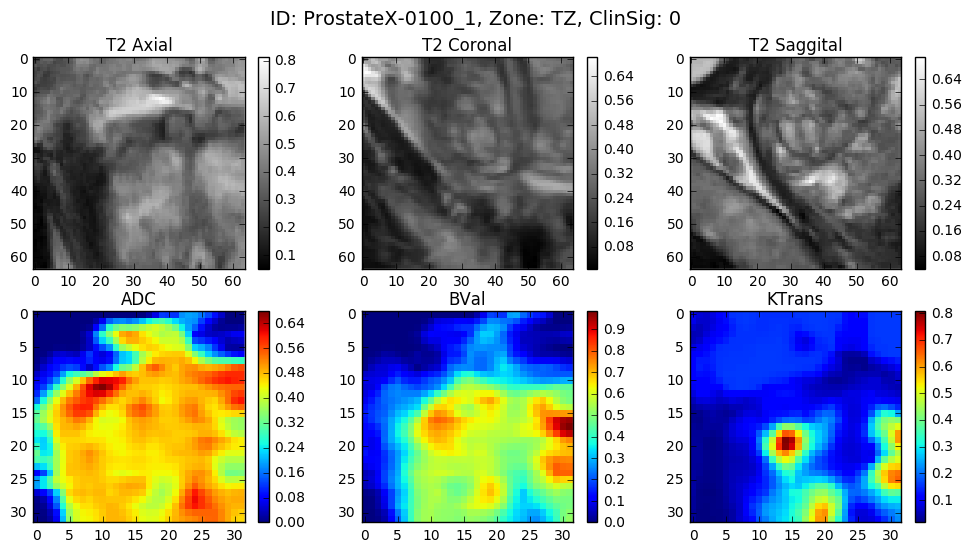

In [19]:
if tra.ndim == 4:
    browse_images_2d(tra)
elif tra.ndim == 5:
    browse_images_3d(tra)

In [ ]:
count = 0
total = tra.shape[0]*tra.shape[1]
for i in range(tra.shape[0]):
    for j in range(tra.shape[1]):
        tra_slice = tra[i,j,:,0]
        if np.sum(tra_slice) == 0:
            # print i, uids[i], ', slice: ',j
            count += 1
print(count/(total*0.01))

In [ ]:
count = 0
total = cor.shape[0]*cor.shape[1]
for i in range(cor.shape[0]):
    for j in range(cor.shape[1]):
        cor_slice = cor[i,j,:,:,0]
        if np.sum(cor_slice) == 0:
            # print i,uids[i], ', slice: ',j
            count += 1
print(count/(total*0.01))

In [ ]:
for i in range(sag.shape[0]):
    for j in range(sag.shape[1]):
        sag_slice = sag[i,j,:,:,0]
        if np.sum(sag_slice) == 0:
            print(i,uids[i], ', slice: ',j)

In [ ]:
for i in range(adc.shape[0]):
    for j in range(adc.shape[1]):
        adc_slice = adc[i,j,:,:,0]
        if np.sum(adc_slice) == 0:
            print(i,uids[i], ', slice: ',j)

In [ ]:
for i in range(bval.shape[0]):
    for j in range(bval.shape[1]):
        bval_slice = bval[i,j,:,:,0]
        if np.sum(bval_slice) == 0:
            print(i,uids[i], ', slice: ',j)

In [ ]:
for i in range(ktrans.shape[0]):
    for j in range(ktrans.shape[1]):
        ktrans_slice = ktrans[i,j,:,:,0]
        if np.sum(ktrans_slice) == 0:
            print(i,uids[i], ', slice: ',j)